<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Install Tensorflow
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [13]:
# Load the data
data = load_breast_cancer()

print(type(data))
print(data.keys())
print(data.data.shape)
print(data.target)
print(data.target_names)
print(data.target.shape)
print(data.feature_names)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 

In [0]:
# split the data indo traion and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# evaluate the model
print("train score:", model.evaluate(X_train, y_train))
print("Test score", model.evaluate(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 495us/sample - loss: 0.6437 - accuracy: 0.6273 - val_loss: 0.5970 - val_accuracy: 0.6862
Epoch 2/100
381/381 [==============================] - 0s 56us/sample - loss: 0.5841 - accuracy: 0.6955 - val_loss: 0.5410 - val_accuracy: 0.7287
Epoch 3/100
381/381 [==============================] - 0s 53us/sample - loss: 0.5310 - accuracy: 0.7297 - val_loss: 0.4940 - val_accuracy: 0.7766
Epoch 4/100
381/381 [==============================] - 0s 57us/sample - loss: 0.4874 - accuracy: 0.7664 - val_loss: 0.4532 - val_accuracy: 0.7979
Epoch 5/100
381/381 [==============================] - 0s 51us/sample - loss: 0.4507 - accuracy: 0.7874 - val_loss: 0.4178 - val_accuracy: 0.8138
Epoch 6/100
381/381 [==============================] - 0s 54us/sample - loss: 0.4180 - accuracy: 0.8241 - val_loss: 0.3886 - val_

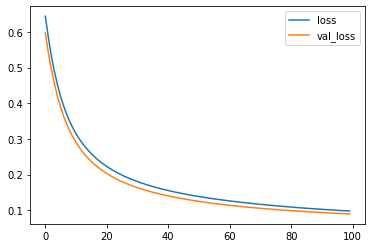

In [7]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

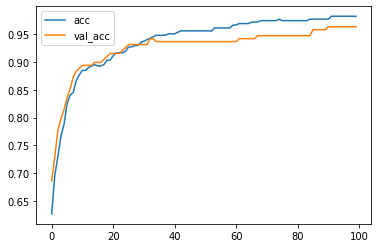

In [8]:
# plot the accuracy

plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

In [9]:
# Make prediction
P = model.predict(X_test)

# round to get the actual prediction
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.]


In [10]:
# calculate the accuracy, compare it to evaluate() output
print("manually calculated:", np.mean(P == y_test))
print("evaluate output:", model.evaluate(X_test, y_test))

manually calculated: 0.9627659574468085
188/188 [==============================] - 0s 49us/sample - loss: 0.0899 - accuracy: 0.9628
evaluate output: [0.08988825723211816, 0.96276593]
